In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('./dataset/insurance_miptstats.csv', parse_dates=[0])
data.head()

,birthday,sex,bmi,children,smoker,region,charges
0,2001-12-20,female,27.900,0,yes,southwest,16884.92400
1,2003-03-18,male,33.770,1,no,southeast,1725.55230
2,1992-11-02,male,33.000,3,no,southeast,4449.46200
3,1987-07-27,male,22.705,0,no,northwest,21984.47061
4,1988-11-04,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [108]:
train, test = train_test_split(data, test_size=0.2)

In [5]:
train['age'] = (pd.Timestamp('2024-05-20') - train['birthday']) / pd.Timedelta('365d')

In [6]:
categorial_features = ['sex', 'smoker', 'region']  # категориальные признаки
real_features = ['age', 'bmi', 'children']  # вещественные признаки
target_feature = 'charges'  # целевой признак

c:\Users\SystemX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SystemX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SystemX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SystemX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

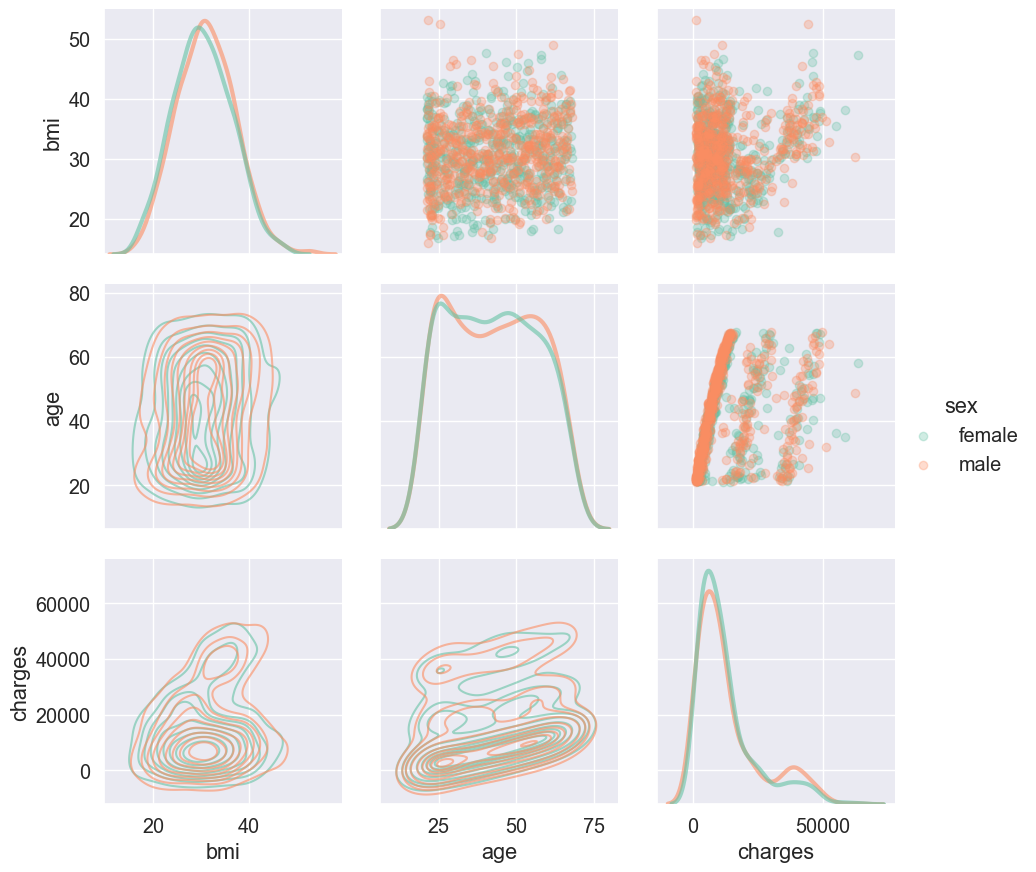

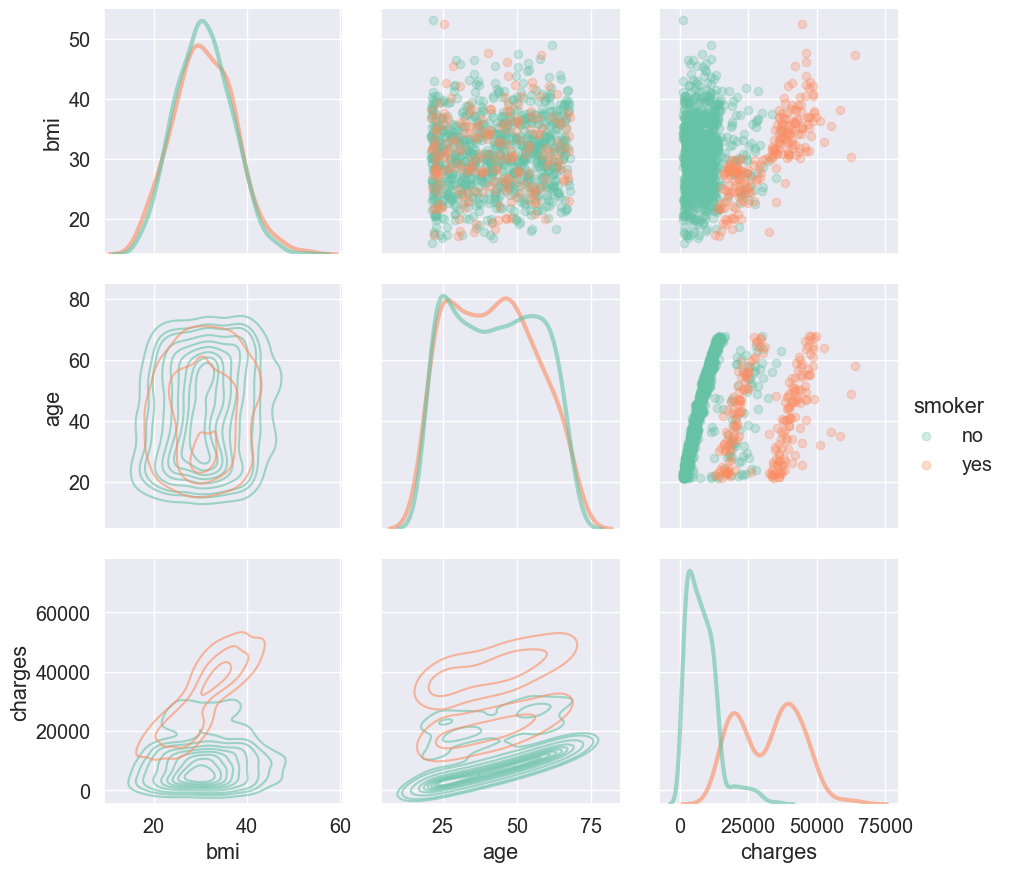

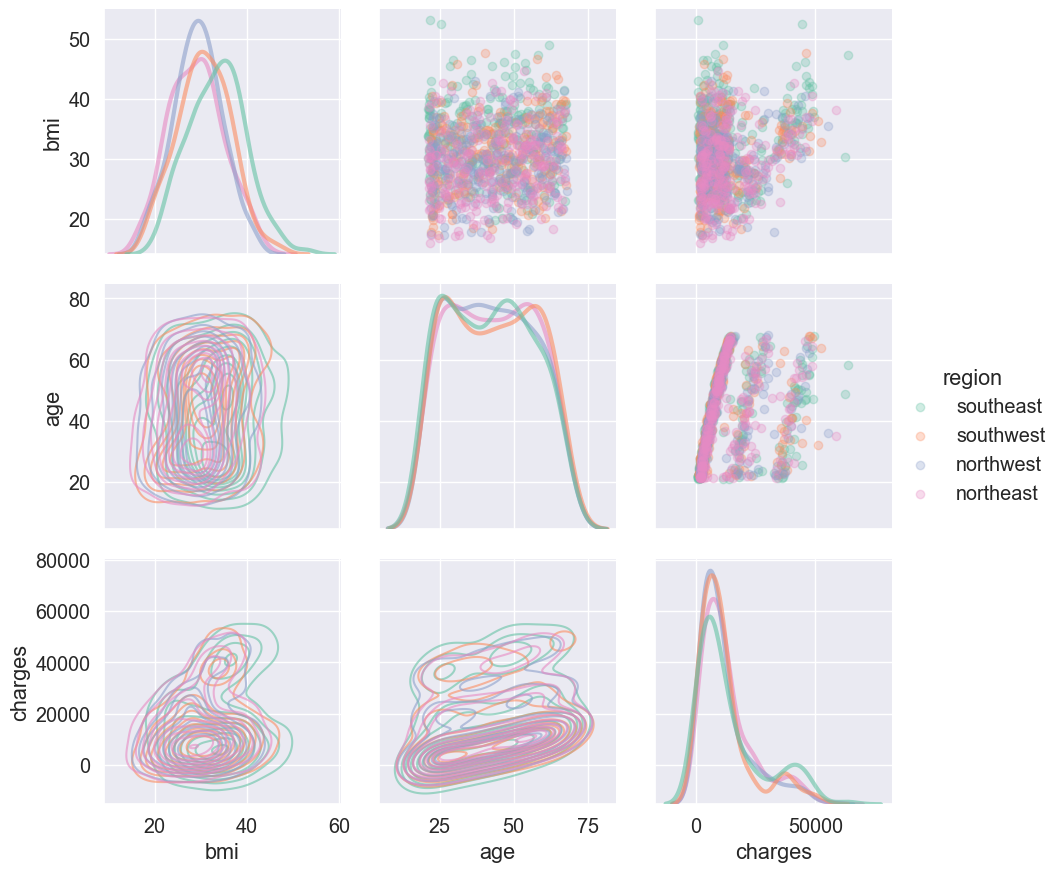

In [7]:
for hue in categorial_features:
    g = sns.PairGrid(train[['bmi', 'age', 'charges', hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

In [98]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
X_train = np.hstack([train[real_features], train_cat])


In [11]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

In [12]:
model.coef_

array([  246.43542397,   340.84542872,   497.83101523,   -36.14326276,
       24191.77577964,  -631.86053647, -1327.15644992, -1168.31704218])

In [13]:
model.intercept_

-12350.935286795007

In [14]:
# Получаем возраст клиента по дате рождения
test['age'] = (pd.Timestamp('2021-04-17') - test['birthday']) / pd.Timedelta('365d')

# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

      birthday     sex     bmi  children smoker     region      charges  \
765 1963-11-29  female  31.825         0     no  northwest  11842.62375   
812 1966-08-17    male  21.010         2     no  southeast  11013.71190   
788 1992-01-27    male  22.515         3     no  northeast   5209.57885   
847 1997-04-30    male  50.380         1     no  southeast   2438.05520   

           age  
765  57.421918  
812  54.704110  
788  29.241096  
847  23.980822  


In [74]:
print(test[real_features])
print(test[categorial_features])
print(categorial_features)
print(test_cat[3])
print(X_test[3])


            age     bmi  children
765   57.421918  31.825         0
812   54.704110  21.010         2
788   29.241096  22.515         3
847   23.980822  50.380         1
1076  47.983562  32.000         1
...         ...     ...       ...
791   19.947945  27.600         0
964   52.797260  36.765         2
1043  28.216438  25.800         0
169   27.657534  18.905         3
93    35.816438  34.770         2

[268 rows x 3 columns]
         sex smoker     region
765   female     no  northwest
812     male     no  southeast
788     male     no  northeast
847     male     no  southeast
1076  female     no  southwest
...      ...    ...        ...
791     male     no  southwest
964     male     no  northwest
1043  female     no  southwest
169     male     no  northeast
93      male     no  northwest

[268 rows x 3 columns]
['sex', 'smoker', 'region']
[1. 0. 0. 1. 0.]
[23.98082192 50.38        1.          1.          0.          0.
  1.          0.        ]


In [15]:
test_preds = model.predict(X_test)

In [16]:
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

5926.616754766195

In [17]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

5926.616754766195

In [18]:
metrics.mean_absolute_error(test[target_feature], test_preds)

4062.282201608473

In [19]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [20]:
mean_absolute_percentage_error(test[target_feature], test_preds)

34.869872747802624

In [37]:
train_preds = model.predict(X_train)

metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5, \
metrics.mean_absolute_error(train[target_feature], train_preds), \
mean_absolute_percentage_error(train[target_feature], train_preds)

array([[52.19726027, 42.68      ,  2.        , ...,  0.        ,
         1.        ,  0.        ],
       [52.40273973, 28.7       ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [51.40821918, 40.565     ,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [22.7890411 , 18.6       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [23.69315068, 30.59      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [25.39452055, 31.35      ,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [22]:
sorted(list(zip(data.columns, model.coef_)), 
       key=lambda x: abs(x[1]))

[('children', -36.143262764020534),
 ('birthday', 246.43542396532362),
 ('sex', 340.8454287231835),
 ('bmi', 497.8310152262222),
 ('region', -631.860536473362),
 ('charges', -1327.1564499198535),
 ('smoker', 24191.775779637257)]

In [97]:
def predict(birthday, sex, bmi, children, smoker, region, charges=0):
    birthday = pd.to_datetime(birthday)
    test = pd.DataFrame({'birthday': [birthday], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region], 'charges': [charges]})
    test['age'] = (pd.Timestamp('2021-04-17') - test['birthday']) / pd.Timedelta('365d')
    test_cat = encoder.transform(test[categorial_features])
    X_test = np.hstack([test[real_features], test_cat])
    return model.predict(X_test)

predict('1999-12-12', 'female', 27.9, 0, 'yes', 'southwest', 0)

array([25446.37666726])

In [90]:
test.columns.to_list()[:-1]

['birthday', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

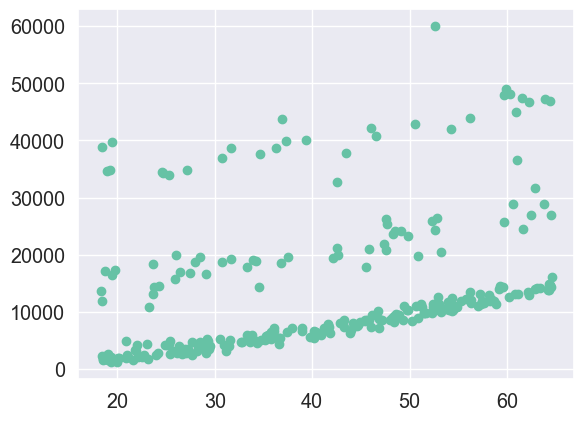

In [107]:
plt.scatter([test['age']], test['charges'])